### **HUMAN RESOURCES ANALYTICS** 


Using Logistic and Random forest methods in Colab

In [1]:
##Imporing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Uploading the dataset in the Colab



In [3]:
from google.colab import files
uploaded = files.upload()


Saving HR_comma_sep.csv to HR_comma_sep (7).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

*Reading the dataset*

In [4]:
dataset=pd.read_csv("HR_comma_sep.csv")
dataset.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


*Knowing more about the data*

In [5]:
dataset.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


*To know aboout which feature column is affecting the label*

In [8]:
s=dataset['salary']
s

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

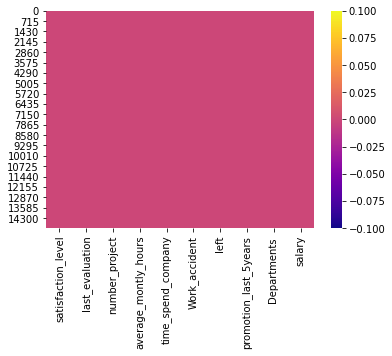

In [9]:
sns.heatmap(dataset.isnull(),cmap='plasma')#to see dataset have any nulls 

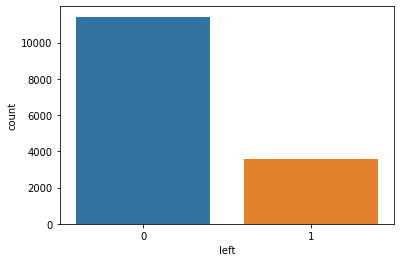

In [10]:
sns.countplot(x='left',data=dataset) 

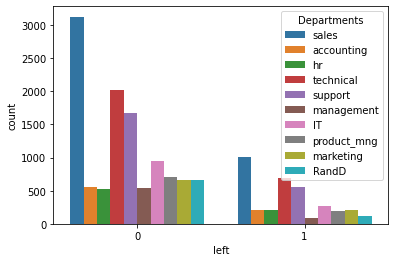

In [11]:
sns.countplot(x="left",hue="Departments ",data=dataset)      #Departmentwise visualisation whether they left r not

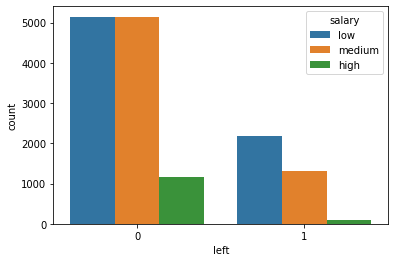

In [12]:
sns.countplot(x="left",hue="salary",data=dataset)       ##visualisation whether they left r not by means of salary

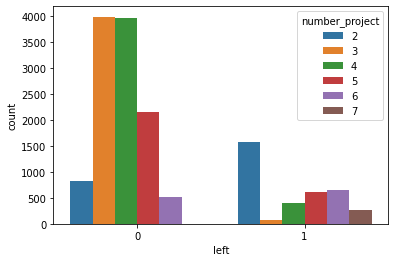

In [13]:
sns.countplot(x='left', hue = 'number_project', data=dataset)    ##visualisation whether they left r not by means of no.of projects


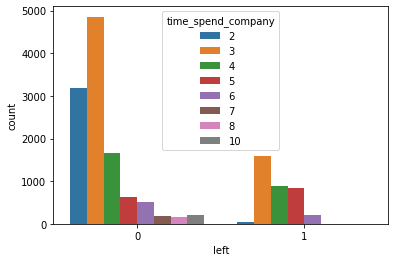

In [14]:
sns.countplot(x='left', hue = 'time_spend_company', data=dataset)     ## ##visualisation whether they left r not by means of time spend


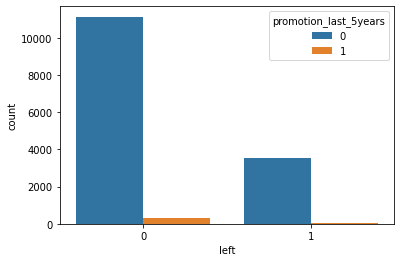

In [15]:
sns.countplot(x='left', hue = 'promotion_last_5years', data=dataset)       ##visualisation whether they left r not by means of promotions from past 5 years


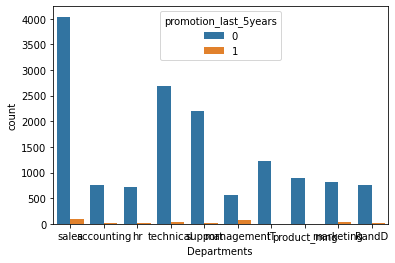

In [16]:
sns.countplot(x="Departments ",hue="promotion_last_5years",data=dataset)    #few other visualiasations


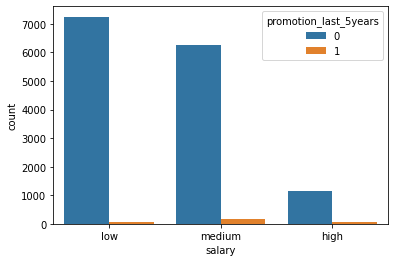

In [17]:
sns.countplot(x="salary",hue="promotion_last_5years",data=dataset)

In [18]:
s=dataset['salary']
s

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

In [19]:
l=dataset['left']
l

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

*Encoding Categorical data*

*As we have categorical data in our dataset........*
*Assignung values to them*




In [20]:
dept=pd.get_dummies(dataset["Departments "],drop_first=True)

dept

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0


In [21]:
dataset=pd.concat([dataset,dept],axis=1)
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,0,0,0,0,0,0,1,0


In [22]:
sal=pd.get_dummies(dataset["salary"],drop_first=True)
dataset=pd.concat([dataset,sal],axis=1)
sal


,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [23]:
dataset.drop(["Departments "],axis=1,inplace=True)
dataset.drop(["salary"],axis=1,inplace=True)


*Spliting the dataset in labels and features*

In [24]:
x = dataset.drop('left', axis = 1)
y = dataset['left']


*Spliting the data in traing and into testing *

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


There is no missing data here .

***Now we r using Logistic regression to solve this dataset***

In [26]:
from sklearn.linear_model import LogisticRegression

just to not to display the warning we r importig warnings

In [27]:
import warnings
warnings.filterwarnings('ignore')


[link text]( ##https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html   for syntax)

In [28]:
reg=LogisticRegression()
reg.fit(x_train,y_train)         


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = reg.predict(x_test)  ##predicting the outputs
y_pred[5]


0

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score    ##to see how many of our predictons are correct and to see the accuracy score
cm = confusion_matrix(y_test, y_pred)
cm

array([[2105,  182],
       [ 402,  311]])

In [31]:
accuracy_score(y_test, y_pred)


0.8053333333333333

Here we got accuracy as nearly 80% 
Bt this is not sufficient  ,lets try another algorithm


***Using Random forest***

We need to do scaling as this Random forest doesnt have inbuilt scaling property in it

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(random_state=0)
rc.fit(x_train,y_train)
y_pred_rc=rc.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_rc,y_test)


0.9916666666666667

We got accuracy as 99% using this  
So,we can conclude that this dataset can be solved effectively by using Random tress algorithm